In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics==8.2.2
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.0+cpu CPU (Intel Xeon 2.00GHz)
Setup complete ✅ (96 CPUs, 334.6 GB RAM, 15.8/225.3 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qfYKYsan8gTZ4dI8J04G")
project = rf.workspace("rohith-4hwdq").project("intial-2")
version = project.version(2)
dataset = version.download("yolov9")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to intial-2-2 in yolov9:: 100%|██████████| 201/201 [00:00<00:00, 2881.39it/s]


In [6]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/intial-2-2/data.yaml

names:
- '11'
- '12'
- '13'
- '14'
- '15'
- '16'
- '17'
- '18'
- '21'
- '22'
- '23'
- '24'
- '25'
- '26'
- '27'
- '28'
- '31'
- '32'
- '33'
- '34'
- '35'
- '36'
- '37'
- '38'
- '41'
- '42'
- '43'
- '44'
- '45'
- '46'
- '47'
- '48'
nc: 32
roboflow:
  license: CC BY 4.0
  project: intial-2
  url: https://universe.roboflow.com/rohith-4hwdq/intial-2/dataset/2
  version: 2
  workspace: rohith-4hwdq
test: ../test/images
train: train/images
val: valid/images


In [5]:
# define number of classes based on YAML
import yaml
with open("/content/intial-2-2/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [3]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results"
#Define subdirectory for this specific training
name = "/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [1]:
from ultralytics import YOLO

# Build a YOLOv9c model from pretrained weight
model = YOLO('/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/weights/last.pt')

# Display model information (optional)
model.info()

YOLOv9c-seg summary: 654 layers, 27860112 parameters, 0 gradients, 159.2 GFLOPs


(654, 27860112, 0, 159.20768)

In [ ]:
#Train the Model
results=model.train(data='/content/intial-2-2/data.yaml',
                    epochs=200,
                    patience=0,#I am setting patience=120 to disable early stopping after 120 epoch only
                    batch=5,
                    imgsz=1300,
                    save=True,
                    project=project,
                    name=name,
                    verbose=True,
                    plots=True,
                    task='segment',
                    )

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=/content/intial-2-2/data.yaml, epochs=200, time=None, patience=0, batch=5, imgsz=1300, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results, name=200_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]


Overriding model.yaml nc=80 with nc=32

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytic

train: Scanning /content/intial-2-2/train/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 468.76it/s]

train: WARNING ⚠️ /content/intial-2-2/train/images/94_png.rf.25eb169f29c15d756ea8a50311d9ae28.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/intial-2-2/train/images/94_png.rf.caac2f95fc3204e838b70d8b114bf6f6.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/intial-2-2/train/images/94_png.rf.e2fdfbce7d790f5a6923a07269b48242.jpg: 1 duplicate labels removed


train: New cache created: /content/intial-2-2/train/labels.cache


val: Scanning /content/intial-2-2/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 407.07it/s]

val: New cache created: /content/intial-2-2/valid/labels.cache


Plotting labels to /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005078125), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1312 train, 1312 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200         0G      1.423      2.785      4.054       1.51        209       1312: 100%|██████████| 18/18 [06:31<00:00, 21.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.30s/it]

                   all          6        146     0.0807      0.595       0.17      0.135     0.0805      0.594       0.17      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200         0G      1.205      2.212      2.659      1.316        245       1312: 100%|██████████| 18/18 [05:51<00:00, 19.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]

                   all          6        146      0.166      0.646      0.284      0.219      0.166      0.646      0.285      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200         0G      1.164      2.028      2.362      1.257        235       1312: 100%|██████████| 18/18 [05:42<00:00, 19.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]

                   all          6        146      0.269      0.695      0.384      0.319      0.269      0.695      0.382      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200         0G      1.196      2.069      2.152       1.25        348       1312: 100%|██████████| 18/18 [05:44<00:00, 19.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]

                   all          6        146      0.365      0.604       0.35      0.282      0.365      0.604       0.35      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200         0G      1.237      2.051      2.125       1.27        244       1312: 100%|██████████| 18/18 [05:35<00:00, 18.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]

                   all          6        146      0.321      0.681       0.44      0.325      0.321      0.681       0.44      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200         0G      1.286      2.169      2.236       1.31        313       1312: 100%|██████████| 18/18 [05:37<00:00, 18.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]

                   all          6        146      0.239      0.826      0.447      0.327      0.239      0.826      0.447      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200         0G      1.249      2.138      2.313      1.256        407       1312: 100%|██████████| 18/18 [05:38<00:00, 18.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          6        146      0.211      0.714      0.389      0.306      0.211      0.714      0.389      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200         0G      1.174      2.069      2.236       1.23        355       1312: 100%|██████████| 18/18 [05:36<00:00, 18.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]

                   all          6        146      0.175       0.79      0.372      0.292      0.174      0.784      0.367      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200         0G       1.16      2.085      2.182      1.255        249       1312: 100%|██████████| 18/18 [05:31<00:00, 18.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]

                   all          6        146      0.344      0.665      0.463      0.365      0.344      0.665      0.466      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200         0G      1.171      2.034      1.995      1.231        281       1312: 100%|██████████| 18/18 [05:48<00:00, 19.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]

                   all          6        146      0.235      0.744       0.44      0.359      0.235      0.744       0.44      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200         0G      1.202       2.06      1.959      1.211        200       1312: 100%|██████████| 18/18 [05:54<00:00, 19.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]

                   all          6        146      0.252      0.818       0.48      0.377      0.252      0.818      0.481      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200         0G      1.125      1.949      1.904      1.208        398       1312: 100%|██████████| 18/18 [05:40<00:00, 18.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

                   all          6        146      0.275      0.766      0.503      0.398      0.275      0.763      0.502        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200         0G      1.104       1.88      1.859       1.18        236       1312: 100%|██████████| 18/18 [05:43<00:00, 19.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

                   all          6        146      0.369      0.775      0.507      0.414      0.369      0.775      0.507      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200         0G      1.124      1.929      1.796      1.134        230       1312: 100%|██████████| 18/18 [05:47<00:00, 19.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all          6        146      0.356      0.722      0.508      0.398      0.356      0.722      0.508      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200         0G      1.114      1.841      1.764       1.13        319       1312: 100%|██████████| 18/18 [05:46<00:00, 19.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all          6        146      0.348      0.751      0.528      0.428      0.348      0.751      0.528      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200         0G      1.153      1.902      1.702      1.167        187       1312: 100%|██████████| 18/18 [05:39<00:00, 18.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all          6        146      0.373      0.729      0.539      0.419      0.373      0.729      0.539      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200         0G      1.114       1.86      1.668      1.178        302       1312: 100%|██████████| 18/18 [05:38<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]

                   all          6        146      0.359      0.775      0.544      0.433      0.359      0.775      0.544      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200         0G        1.1      1.878      1.556      1.148        294       1312: 100%|██████████| 18/18 [05:45<00:00, 19.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]

                   all          6        146      0.298      0.786      0.562      0.461      0.298      0.786      0.562      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200         0G      1.104       1.85      1.584      1.144        297       1312: 100%|██████████| 18/18 [05:51<00:00, 19.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]

                   all          6        146      0.389      0.786      0.595      0.494      0.389      0.786      0.595      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200         0G      1.058        1.8       1.54      1.123        253       1312: 100%|██████████| 18/18 [05:53<00:00, 19.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]

                   all          6        146      0.404      0.781      0.598      0.469      0.404      0.781      0.598      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200         0G      1.077      1.751       1.51      1.116        242       1312: 100%|██████████| 18/18 [05:49<00:00, 19.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

                   all          6        146      0.393      0.837      0.607      0.483      0.393      0.837      0.606      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200         0G      1.178      1.924      1.591      1.174        376       1312: 100%|██████████| 18/18 [05:45<00:00, 19.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all          6        146      0.398      0.801      0.604       0.47      0.398      0.801      0.604      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200         0G      1.153      1.858      1.532      1.159        226       1312: 100%|██████████| 18/18 [05:51<00:00, 19.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]

                   all          6        146      0.414      0.847      0.629      0.508       0.41      0.843      0.623       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200         0G      1.077      1.793      1.499      1.121        344       1312: 100%|██████████| 18/18 [05:44<00:00, 19.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all          6        146      0.408      0.869      0.638       0.49      0.408      0.869      0.638      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200         0G      1.064      1.754      1.473      1.104        328       1312: 100%|██████████| 18/18 [05:53<00:00, 19.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all          6        146      0.389      0.882      0.618      0.489      0.389      0.882      0.618      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200         0G       1.07      1.751        1.4      1.128        288       1312: 100%|██████████| 18/18 [05:45<00:00, 19.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all          6        146      0.387      0.808      0.577      0.465      0.387      0.808      0.577      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200         0G      1.097      1.731      1.417       1.13        289       1312: 100%|██████████| 18/18 [05:44<00:00, 19.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all          6        146      0.421      0.792      0.623        0.5      0.421      0.792      0.623      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200         0G      1.035      1.732      1.392      1.083        264       1312: 100%|██████████| 18/18 [05:45<00:00, 19.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]

                   all          6        146       0.43      0.808      0.641      0.514       0.43      0.808      0.641      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200         0G      1.005      1.703      1.341      1.068        354       1312: 100%|██████████| 18/18 [05:52<00:00, 19.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all          6        146      0.419      0.812      0.614      0.501      0.419      0.812      0.614      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200         0G     0.9947      1.635      1.313      1.066        282       1312: 100%|██████████| 18/18 [05:53<00:00, 19.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]

                   all          6        146      0.475      0.815      0.651       0.54      0.475      0.815      0.651      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200         0G     0.9908      1.654      1.297      1.081        218       1312: 100%|██████████| 18/18 [05:52<00:00, 19.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]

                   all          6        146      0.447       0.88      0.676      0.553      0.447       0.88      0.676      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200         0G     0.9885      1.663      1.309      1.059        298       1312: 100%|██████████| 18/18 [05:45<00:00, 19.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all          6        146      0.522      0.782      0.678       0.55      0.522      0.782      0.678      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200         0G     0.9938      1.646      1.302      1.069        283       1312: 100%|██████████| 18/18 [05:49<00:00, 19.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all          6        146      0.469      0.813      0.678      0.554      0.469      0.813      0.678       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200         0G     0.9294      1.543        1.3      1.029        236       1312: 100%|██████████| 18/18 [05:47<00:00, 19.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

                   all          6        146      0.436      0.856      0.624      0.508      0.436      0.856      0.624      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200         0G     0.9261      1.539      1.303     0.9902        294       1312:   6%|▌         | 1/18 [00:19<05:24, 19.11s/it]

In [ ]:
#Continuation for Training
#Train the Model
results=model.train(data='/content/intial-2-2/data.yaml',
                    epochs=200,
                    patience=0,#I am setting patience=120 to disable early stopping after 120 epoch only
                    batch=5,
                    imgsz=1300,
                    save=True,
                    project=project,
                    name=name,
                    verbose=True,
                    plots=True,
                    task='segment',
                    resume=True
                    )

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/weights/last.pt, data=/content/intial-2-2/data.yaml, epochs=200, time=None, patience=0, batch=5, imgsz=1300, save=True, save_period=-1, cache=False, device=None, workers=0, project=/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results, name=200_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, sour

100%|██████████| 755k/755k [00:00<00:00, 15.6MB/s]


TensorBoard: Start with 'tensorboard --logdir /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-', view at http://localhost:6006/

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   285747

train: Scanning /content/intial-2-2/train/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 364.22it/s]

train: WARNING ⚠️ /content/intial-2-2/train/images/94_png.rf.25eb169f29c15d756ea8a50311d9ae28.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/intial-2-2/train/images/94_png.rf.caac2f95fc3204e838b70d8b114bf6f6.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/intial-2-2/train/images/94_png.rf.e2fdfbce7d790f5a6923a07269b48242.jpg: 1 duplicate labels removed
train: New cache created: /content/intial-2-2/train/labels.cache



val: Scanning /content/intial-2-2/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 570.11it/s]

val: New cache created: /content/intial-2-2/valid/labels.cache


Plotting labels to /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005078125), 173 bias(decay=0.0)
Resuming training /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/weights/last.pt from epoch 46 to 200 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 1312 train, 1312 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200         0G      1.408      3.682      2.387      1.305        209       1312: 100%|██████████| 18/18 [06:25<00:00, 21.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.69s/it]

                   all          6        146          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200         0G      1.246       2.86      1.901      1.218        245       1312: 100%|██████████| 18/18 [06:11<00:00, 20.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]

                   all          6        146     0.0625     0.0104     0.0365     0.0292     0.0625     0.0104     0.0365      0.031



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200         0G      1.199      2.536      1.755      1.219        235       1312: 100%|██████████| 18/18 [06:07<00:00, 20.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

                   all          6        146      0.308      0.666      0.478      0.377      0.308      0.666      0.478      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200         0G      1.145      2.112      1.561      1.143        348       1312: 100%|██████████| 18/18 [06:09<00:00, 20.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]

                   all          6        146      0.359      0.769       0.54      0.434      0.359      0.769       0.54      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200         0G      1.097      1.897      1.452      1.132        244       1312: 100%|██████████| 18/18 [06:02<00:00, 20.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all          6        146      0.373       0.76      0.565      0.455      0.373       0.76      0.565       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200         0G      1.062      1.913      1.423      1.124        313       1312: 100%|██████████| 18/18 [06:01<00:00, 20.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all          6        146      0.385      0.834      0.566       0.45      0.385      0.834      0.566      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200         0G      1.076       1.84       1.36      1.126        407       1312: 100%|██████████| 18/18 [06:02<00:00, 20.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all          6        146      0.454      0.821      0.574      0.456      0.454      0.821      0.574      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200         0G      1.034      1.775      1.354      1.095        355       1312: 100%|██████████| 18/18 [06:02<00:00, 20.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]

                   all          6        146      0.391      0.821      0.535      0.433      0.391      0.821      0.535      0.422



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200         0G     0.9965      1.788      1.303      1.098        249       1312: 100%|██████████| 18/18 [05:51<00:00, 19.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all          6        146      0.378      0.826      0.544       0.42      0.378      0.826      0.544      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200         0G      1.008      1.739      1.267      1.078        315       1312:  94%|█████████▍| 17/18 [05:34<00:19, 19.37s/it]

In [ ]:
#Continuation for Training
#Train the Model
results=model.train(data='/content/intial-2-2/data.yaml',
                    epochs=200,
                    patience=0,#I am setting patience=120 to disable early stopping after 120 epoch only
                    batch=5,
                    imgsz=1300,
                    save=True,
                    project=project,
                    name=name,
                    verbose=True,
                    plots=True,
                    task='segment',
                    resume=True
                    )

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/weights/last.pt, data=/content/intial-2-2/data.yaml, epochs=200, time=None, patience=0, batch=5, imgsz=1300, save=True, save_period=-1, cache=False, device=None, workers=0, project=/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results, name=200_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, sour

train: Scanning /content/intial-2-2/train/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/intial-2-2/train/images/94_png.rf.25eb169f29c15d756ea8a50311d9ae28.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/intial-2-2/train/images/94_png.rf.caac2f95fc3204e838b70d8b114bf6f6.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/intial-2-2/train/images/94_png.rf.e2fdfbce7d790f5a6923a07269b48242.jpg: 1 duplicate labels removed



val: Scanning /content/intial-2-2/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005078125), 173 bias(decay=0.0)
Resuming training /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/weights/last.pt from epoch 56 to 200 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 1312 train, 1312 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200         0G      1.286      4.123      1.922      1.235        209       1312: 100%|██████████| 18/18 [06:21<00:00, 21.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all          6        146     0.0284     0.0245     0.0149    0.00386          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200         0G      1.241       3.09      1.738      1.208        245       1312: 100%|██████████| 18/18 [05:57<00:00, 19.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all          6        146      0.125      0.509       0.27      0.176     0.0986      0.413      0.203     0.0965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200         0G      1.191       3.22      1.643      1.251        235       1312: 100%|██████████| 18/18 [05:56<00:00, 19.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all          6        146      0.286      0.665      0.456      0.337      0.287      0.663      0.455      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200         0G      1.168      2.504      1.528      1.157        348       1312: 100%|██████████| 18/18 [06:05<00:00, 20.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]

                   all          6        146      0.323      0.668        0.5      0.378      0.324      0.677      0.501      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200         0G      1.025      2.061      1.427      1.105        244       1312: 100%|██████████| 18/18 [05:56<00:00, 19.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]

                   all          6        146      0.372      0.796      0.575      0.458      0.372      0.796      0.575      0.422



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200         0G     0.9858      2.698      1.387      1.099        313       1312: 100%|██████████| 18/18 [05:55<00:00, 19.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]

                   all          6        146      0.378      0.712      0.518      0.403      0.378      0.712      0.517      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200         0G      1.123      2.094      1.532      1.252        188       1312:   0%|          | 0/18 [00:18<?, ?it/s]

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/weights/best.pt')

# Customize validation settings
validation_results = model.val(data='/content/intial-2-2/data.yaml',
                               imgsz=1300,
                               batch=2,
                               conf=0.25,
                               project=project,
                    name=name)

WARNING ⚠️ imgsz=[1300] must be multiple of max stride 32, updating to [1312]
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv9c-seg summary (fused): 411 layers, 27649200 parameters, 0 gradients, 157.8 GFLOPs


val: Scanning /content/intial-2-2/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 136.01it/s]

val: New cache created: /content/intial-2-2/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:45<00:00, 15.27s/it]


                   all          6        146      0.466      0.803       0.64      0.535      0.466      0.803       0.64      0.529
                    11          6          6        0.5          1      0.497      0.431        0.5          1      0.497       0.42
                    12          6          6      0.429        0.5      0.428      0.385      0.429        0.5      0.428      0.361
                    13          6          6      0.556      0.833      0.642      0.516      0.556      0.833      0.642      0.559
                    14          6          6        0.5      0.667       0.61      0.503        0.5      0.667       0.61      0.494
                    15          6          4      0.375       0.75       0.39      0.327      0.375       0.75       0.39      0.317
                    16          6          4        0.5       0.75       0.81      0.609        0.5       0.75       0.81      0.584
                    17          6          5      0.429        0.6   

In [ ]:
/content/intial-2-1/valid

In [ ]:

%load_ext tensorboard
%tensorboard --logdir "/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-" --port 6007

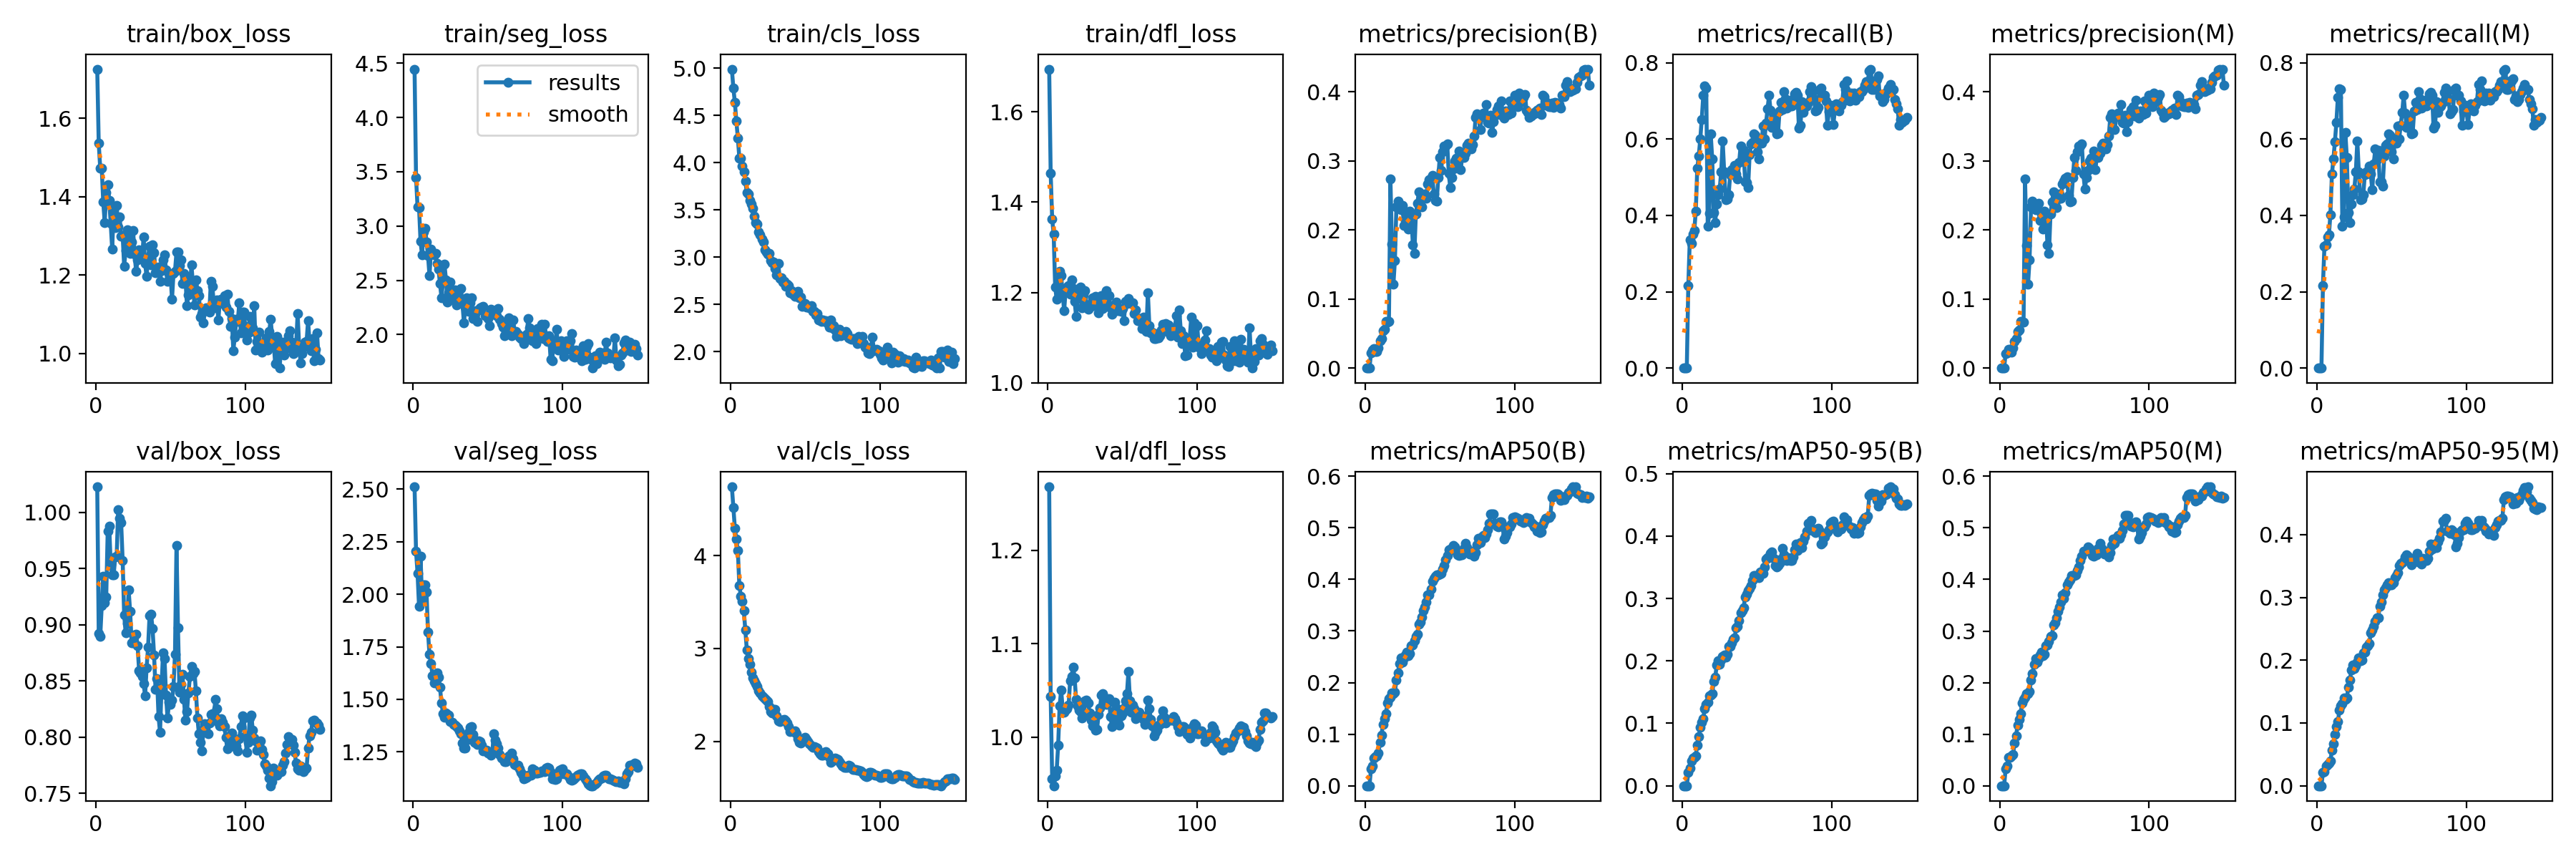

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/results.png')

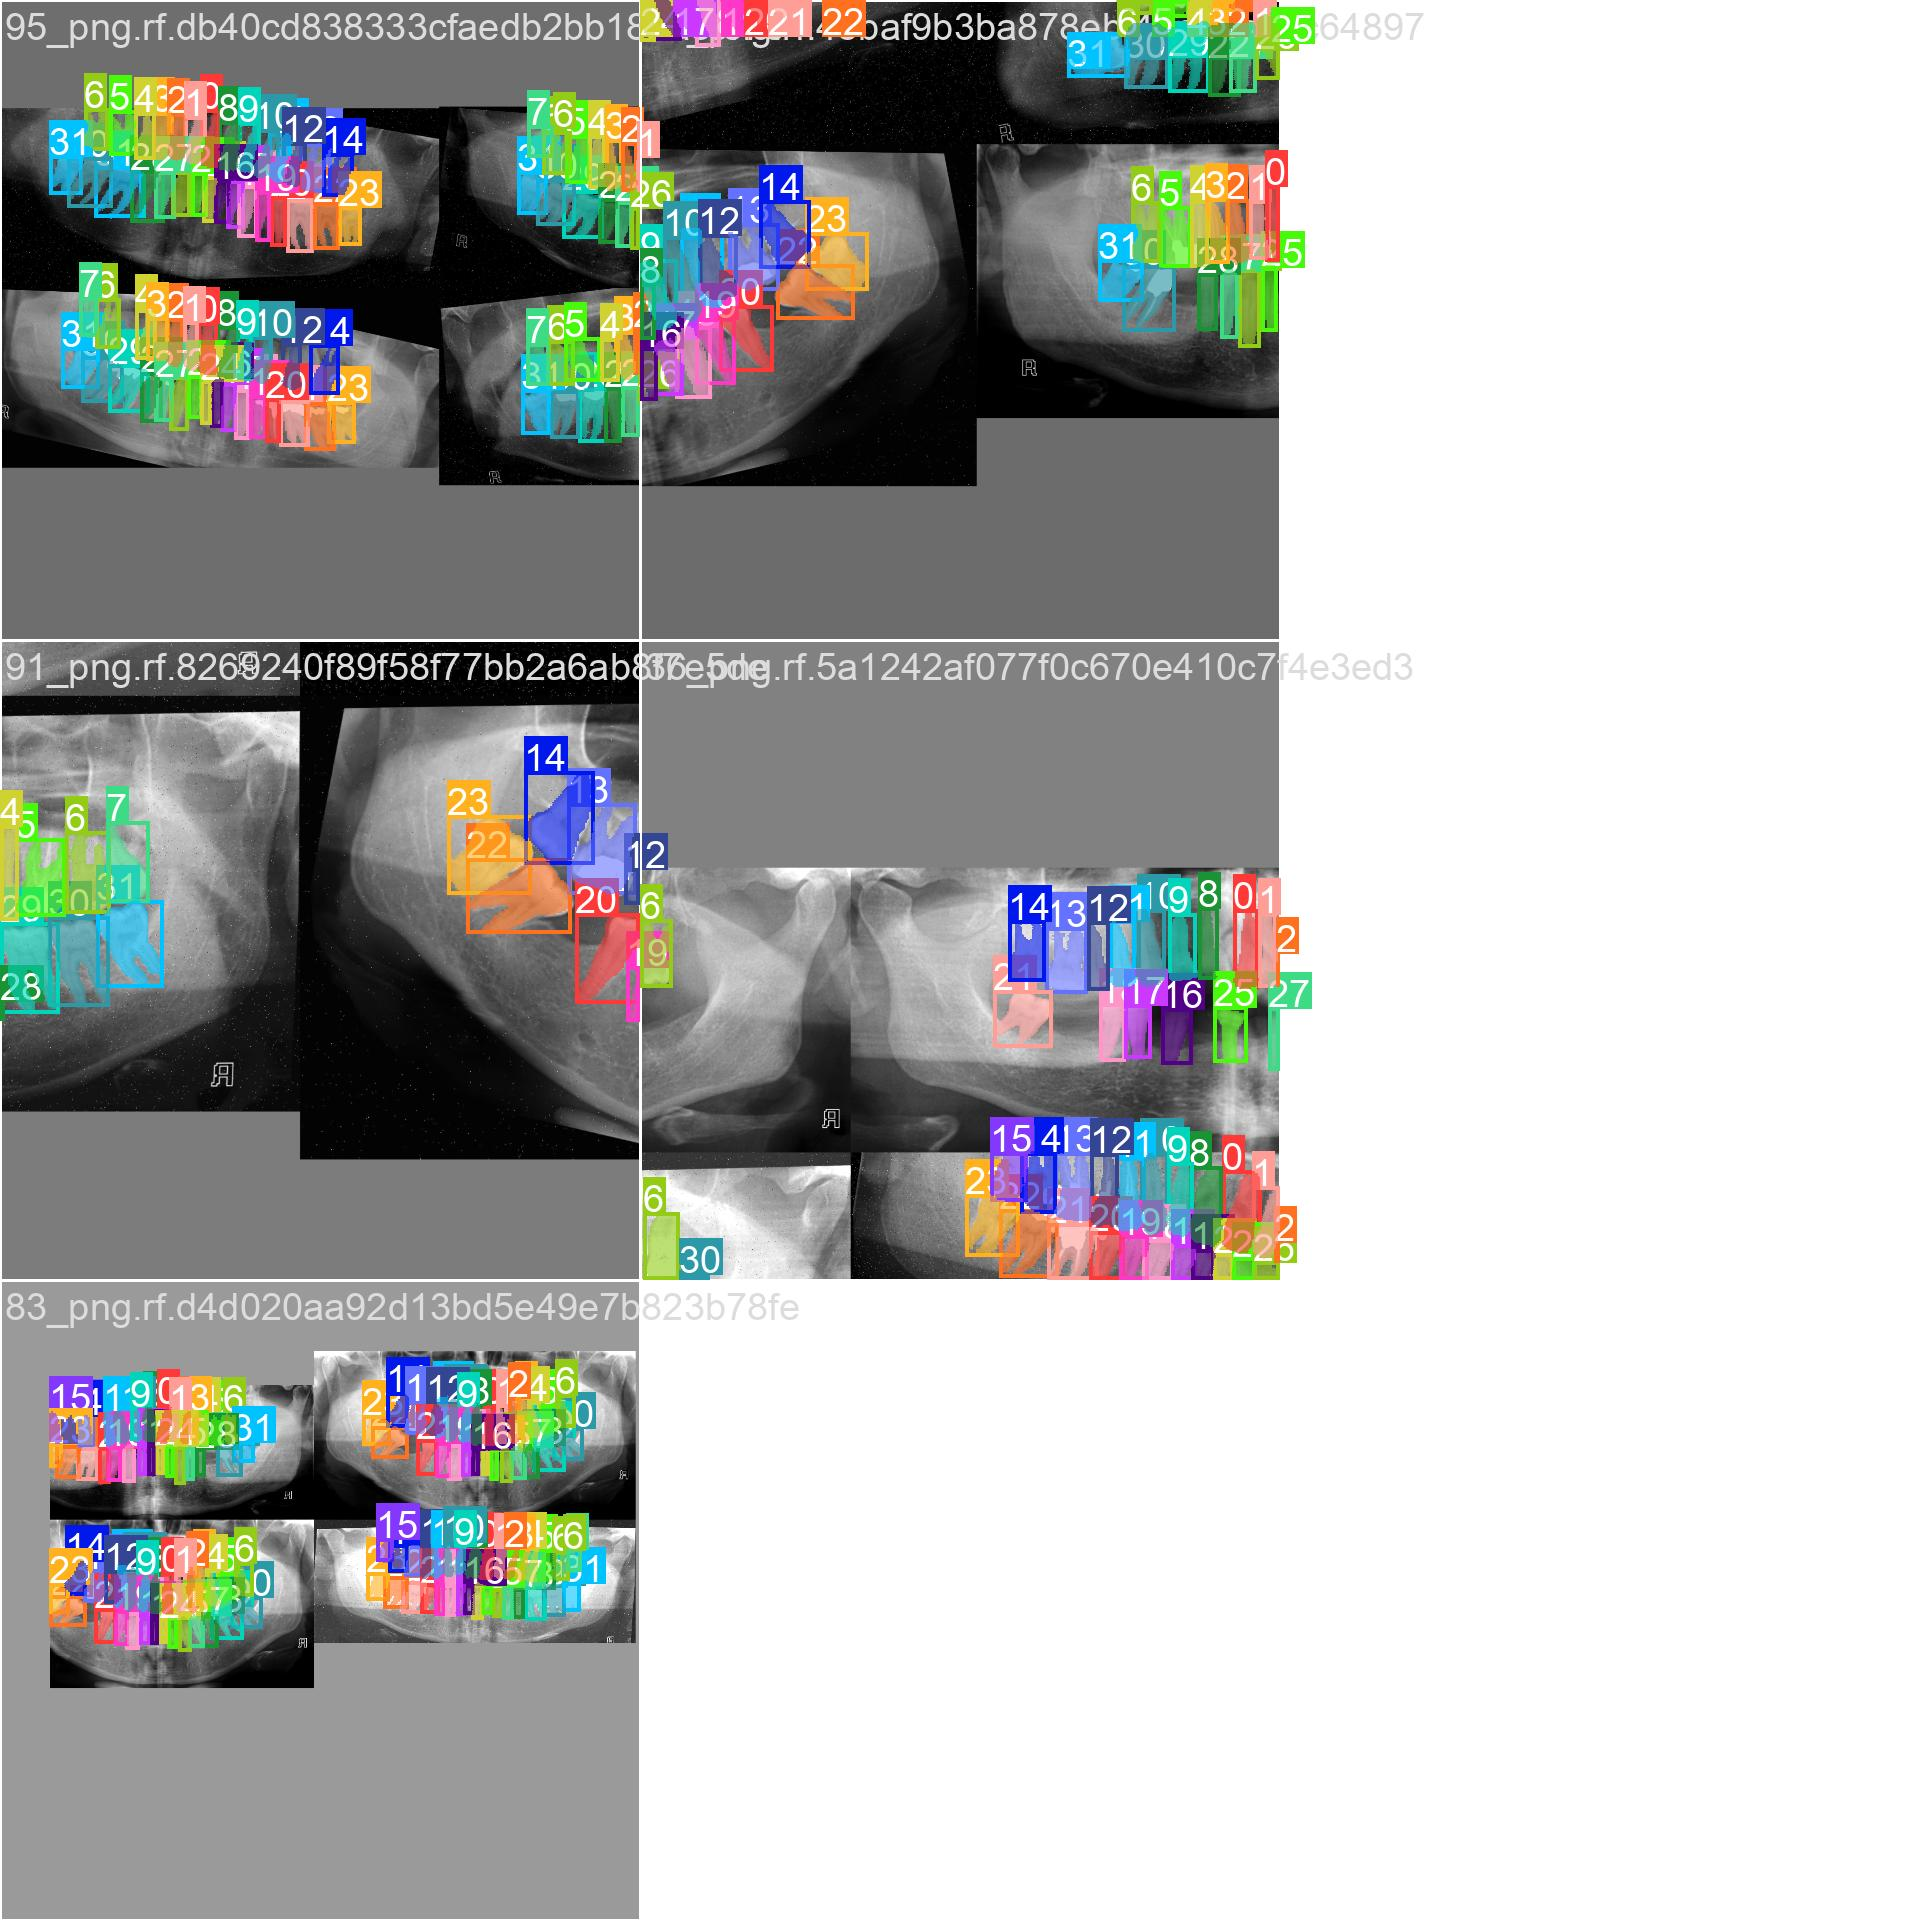

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/train_batch2.jpg',width=3000,)

In [ ]:

my_new_model = YOLO('/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/200_epochs-/weights/best.pt')

In [ ]:
new_image = '/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/Test images/test1.jpg'
new_results = my_new_model.predict(new_image, conf=0.2,project='/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results',
                                   name='Test_inference',save=True,show_conf=False)  #Adjust conf threshold


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/Test images/test1.jpg: 800x1312 1 12, 1 15, 2 16s, 1 21, 1 22, 1 23, 1 24, 1 25, 2 27s, 1 28, 1 31, 1 32, 1 35, 3 37s, 1 41, 1 43, 3 44s, 3 45s, 2 46s, 3 47s, 1 48, 12188.2ms
Speed: 46.9ms preprocess, 12188.2ms inference, 350.2ms postprocess per image at shape (1, 3, 800, 1312)
Results saved to /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/Test_inference4


In [ ]:
new_image2 = '/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/Test images/test2.jpg'
new_results2 = my_new_model.predict(new_image2, conf=0.2,project='/content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results',
                                   name='Test_inference',save=True
                                    ,show_conf=False)  #Adjust conf threshold


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/Test images/test2.jpg: 1120x1312 2 11s, 2 12s, 2 14s, 2 15s, 2 16s, 1 17, 1 18, 2 21s, 1 22, 1 23, 2 24s, 2 25s, 2 26s, 2 27s, 2 31s, 1 33, 2 34s, 2 35s, 2 36s, 2 37s, 1 38, 3 41s, 1 43, 1 45, 2 46s, 2 47s, 1 48, 17057.0ms
Speed: 38.5ms preprocess, 17057.0ms inference, 727.0ms postprocess per image at shape (1, 3, 1120, 1312)
Results saved to /content/drive/MyDrive/Colab Notebooks/YoloV9_without_Augmentation/results/Test_inference5


In [ ]:
import matplotlib.pyplot as plt


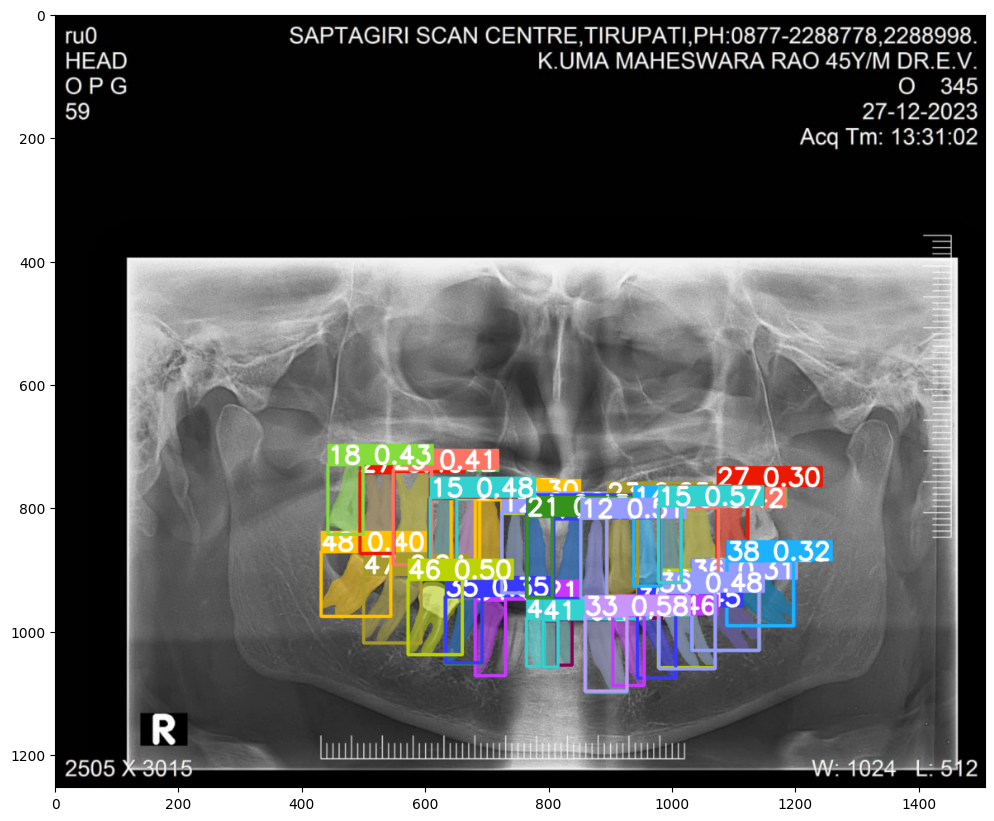

In [ ]:
new_result2_array = new_results2[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result2_array)

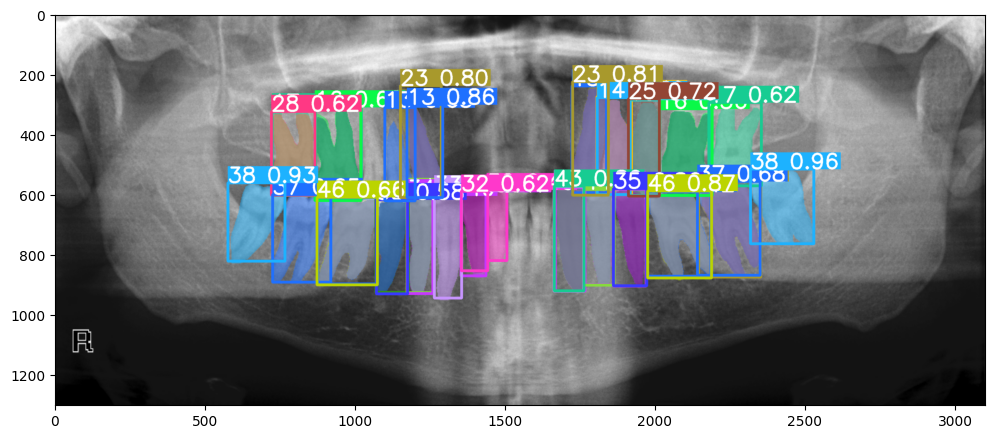

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_result2 = new_results2[0]
new_result2

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '11', 1: '12', 2: '13', 3: '14', 4: '15', 5: '16', 6: '17', 7: '18', 8: '21', 9: '22', 10: '23', 11: '24', 12: '25', 13: '26', 14: '27', 15: '28', 16: '31', 17: '32', 18: '33', 19: '34', 20: '35', 21: '36', 22: '37', 23: '38', 24: '41', 25: '42', 26: '43', 27: '44', 28: '45', 29: '46', 30: '47', 31: '48'}
orig_img: array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2

In [ ]:
new_result = new_results[0]

In [ ]:
new_result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '11', 1: '12', 2: '13', 3: '14', 4: '15', 5: '16', 6: '17', 7: '18', 8: '21', 9: '22', 10: '23', 11: '24', 12: '25', 13: '26', 14: '27', 15: '28', 16: '31', 17: '32', 18: '33', 19: '34', 20: '35', 21: '36', 22: '37', 23: '38', 24: '41', 25: '42', 26: '43', 27: '44', 28: '45', 29: '46', 30: '47', 31: '48'}
orig_img: array([[[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
    

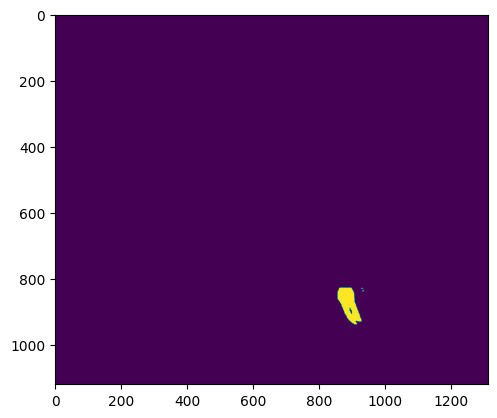

In [ ]:
extracted_masks2 = new_result2.masks.data
extracted_masks2.shape
masks_array2 = extracted_masks2.cpu().numpy()
plt.imshow(masks_array2[6])

In [ ]:
extracted_masks = new_result.masks.data

In [ ]:
extracted_masks.shape

torch.Size([41, 800, 1312])

In [ ]:
masks_array = extracted_masks.cpu().numpy()

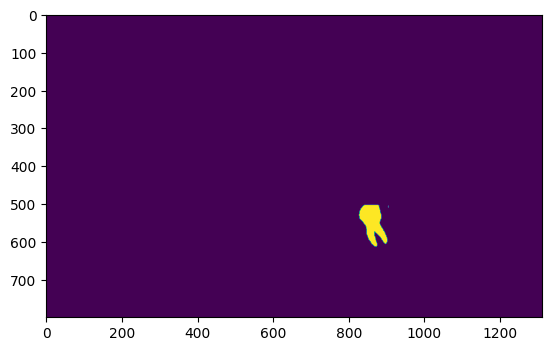

In [ ]:
plt.imshow(masks_array[10])

In [ ]:
class_names2 = new_result2.names.values()
class_names2

dict_values(['11', '12', '13', '14', '15', '16', '17', '18', '21', '22', '23', '24', '25', '26', '27', '28', '31', '32', '33', '34', '35', '36', '37', '38', '41', '42', '43', '44', '45', '46', '47', '48'])

In [ ]:
class_names = new_result.names.values()
class_names

dict_values(['11', '12', '13', '14', '15', '16', '17', '18', '21', '22', '23', '24', '25', '26', '27', '28', '31', '32', '33', '34', '35', '36', '37', '38', '41', '42', '43', '44', '45', '46', '47', '48'])

In [ ]:
# Extract the boxes, which likely contain class IDs
detected_boxes2 = new_result2.boxes.data
# Extract class IDs from the detected boxes
class_labels2 = detected_boxes2[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class2 = {name: [] for name in new_result2.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks2, class_labels2):
    class_name = new_result2.names[class_id]  # Map class ID to class name
    masks_by_class2[class_name].append(mask.cpu().numpy())

In [ ]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())


In [ ]:
for class_name, masks in masks_by_class2.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")

Class Name: 11, Number of Masks: 2
Class Name: 12, Number of Masks: 2
Class Name: 13, Number of Masks: 2
Class Name: 14, Number of Masks: 3
Class Name: 15, Number of Masks: 1
Class Name: 16, Number of Masks: 1
Class Name: 17, Number of Masks: 2
Class Name: 18, Number of Masks: 2
Class Name: 21, Number of Masks: 1
Class Name: 22, Number of Masks: 2
Class Name: 23, Number of Masks: 1
Class Name: 24, Number of Masks: 1
Class Name: 25, Number of Masks: 1
Class Name: 26, Number of Masks: 1
Class Name: 27, Number of Masks: 0
Class Name: 28, Number of Masks: 0
Class Name: 31, Number of Masks: 2
Class Name: 32, Number of Masks: 0
Class Name: 33, Number of Masks: 1
Class Name: 34, Number of Masks: 2
Class Name: 35, Number of Masks: 1
Class Name: 36, Number of Masks: 0
Class Name: 37, Number of Masks: 0
Class Name: 38, Number of Masks: 0
Class Name: 41, Number of Masks: 2
Class Name: 42, Number of Masks: 1
Class Name: 43, Number of Masks: 2
Class Name: 44, Number of Masks: 0
Class Name: 45, Numb

In [ ]:
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")


Class Name: 11, Number of Masks: 1
Class Name: 12, Number of Masks: 0
Class Name: 13, Number of Masks: 0
Class Name: 14, Number of Masks: 0
Class Name: 15, Number of Masks: 0
Class Name: 16, Number of Masks: 1
Class Name: 17, Number of Masks: 0
Class Name: 18, Number of Masks: 1
Class Name: 21, Number of Masks: 2
Class Name: 22, Number of Masks: 0
Class Name: 23, Number of Masks: 0
Class Name: 24, Number of Masks: 4
Class Name: 25, Number of Masks: 3
Class Name: 26, Number of Masks: 0
Class Name: 27, Number of Masks: 1
Class Name: 28, Number of Masks: 0
Class Name: 31, Number of Masks: 3
Class Name: 32, Number of Masks: 1
Class Name: 33, Number of Masks: 1
Class Name: 34, Number of Masks: 2
Class Name: 35, Number of Masks: 2
Class Name: 36, Number of Masks: 1
Class Name: 37, Number of Masks: 0
Class Name: 38, Number of Masks: 0
Class Name: 41, Number of Masks: 3
Class Name: 42, Number of Masks: 2
Class Name: 43, Number of Masks: 1
Class Name: 44, Number of Masks: 2
Class Name: 45, Numb

In [ ]:
maximal_molar_left_masks2 = masks_by_class2['47']
maximal_molar_left_3rd_masks2 = masks_by_class2['46']

In [ ]:
maximal_molar_left_masks = masks_by_class['47']
maximal_molar_left_3rd_masks = masks_by_class['46']

In [ ]:
# Extract the original image
orig_img2 = new_result2.orig_img
print(orig_img2.shape)

(1253, 1508, 3)


In [ ]:
# Extract the original image
orig_img = new_result.orig_img
print(orig_img.shape)

(871, 1448, 3)


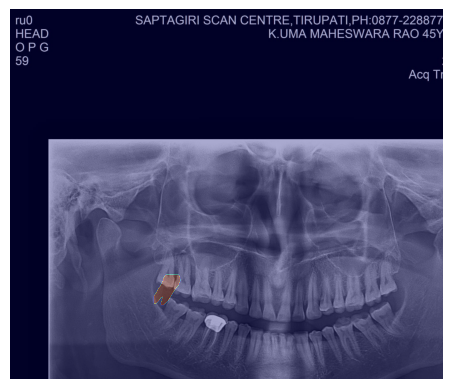

In [ ]:
# Display the original image
plt.imshow(orig_img2, cmap='gray')

# Overlay the mask with some transparency
#plt.imshow(alpha_granule_masks[1], cmap='jet', alpha=0.3)
plt.imshow(maximal_molar_left_masks2[0], cmap='jet', alpha=0.3)
plt.axis('off') # Turn off axis labels
plt.show()

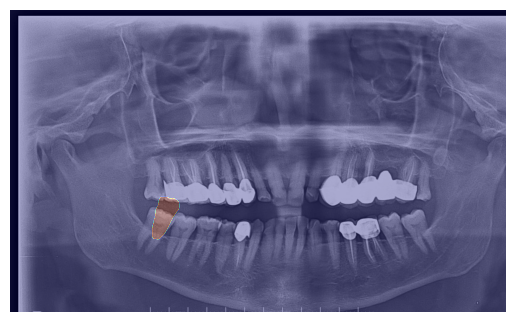

In [ ]:
# Display the original image
plt.imshow(orig_img, cmap='gray')

# Overlay the mask with some transparency
#plt.imshow(alpha_granule_masks[1], cmap='jet', alpha=0.3)
plt.imshow(maximal_molar_left_masks[0], cmap='jet', alpha=0.3)
plt.axis('off') # Turn off axis labels
plt.show()

In [ ]:
import pandas as pd
from skimage.measure import regionprops

# Initialize a list to store the properties
props_list = []

# Iterate through all classes
for class_name, masks in masks_by_class.items():
    # Iterate through the masks for this class
    for mask in masks:
        # Convert the mask to an integer type if it's not already
        mask = mask.astype(int)

        # Apply regionprops to the mask
        props = regionprops(mask)

        # Extract the properties you want (e.g., area, perimeter) and add them to the list
        for prop in props:
            area = prop.area
            perimeter = prop.perimeter
            # Add other properties as needed

            # Append the properties and class name to the list
            props_list.append({'Class Name': class_name, 'Area': area, 'Perimeter': perimeter})

# Convert the list of dictionaries to a DataFrame
props_df = pd.DataFrame(props_list)

# Now props_df contains the properties and class names for all regions

# Save the DataFrame to a CSV file
props_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ITB_Results/YOLOv8_object_properties.csv', index=False)


In [ ]:
props_df

,Class Name,Area,Perimeter
0,11,4203,293.053824
1,16,4070,295.722871
2,18,3776,272.124892
3,21,4111,297.781746
4,21,4100,285.639610
5,24,4191,312.308658
6,24,4468,327.030483
7,24,3776,312.693434
8,24,4120,298.610173
9,25,3690,312.994949


In [ ]:
import seaborn as sns

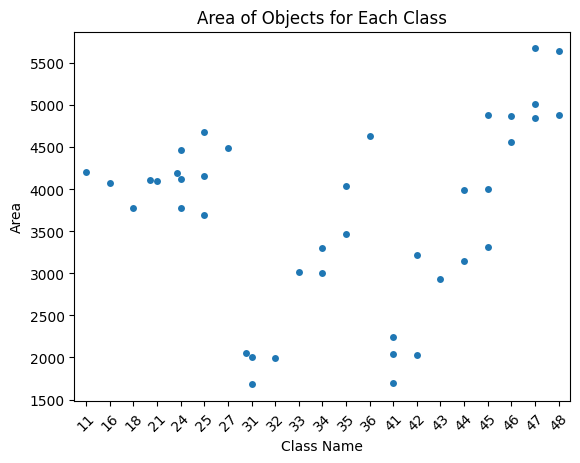

In [ ]:
# Create the swarm plot with Seaborn
sns.swarmplot(x='Class Name', y='Area', data=props_df)

# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

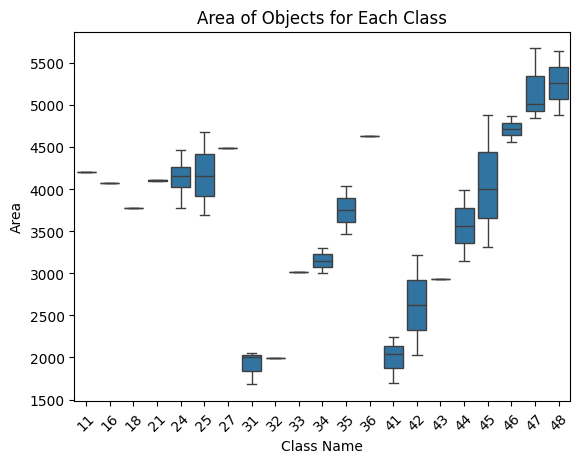

In [ ]:
sns.boxplot(x='Class Name', y='Area', data=props_df)
# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()